# TD3


## Exercise 1: HAC (Hierarchical Agglomerative Clustering)

$ A=(2,5),B=(3,4),C=(5,8),D=(6,2),E=(7,3). $ <br>
We'll compute the clusters for each method: **single-link**, **complete-link**, **average-link**, and **centroid-link**.


In [24]:
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Points
points = {
    "A": (2, 5),
    "B": (3, 4),
    "C": (5, 8),
    "D": (6, 2),
    "E": (7, 3)
}

clusters = {name: [name] for name in points}


#### 1. Compute the Distance Matrix
**The Euclidean distance between two points**
$$ \text{distance} = \sqrt{(x_2-x_1)²+(x_2-x_1)²} $$

**Distance Matrix:**
$$ \begin{pmatrix}
0 & 1.41  & 4.24  & 5.39 & 5.83 \\
 & 0 & 3.61 & 4.24 & 4.47 \\
 &  & 0 & 6.40 & 6.08 \\
 &  &  & 0 & 1.41 \\
 &  &  &  & 0
\end{pmatrix} $$



In [5]:
def calculate_distance_matrix(points, clusters):
    distances = {}
    for c1 in clusters:
        for c2 in clusters:
            if c1 != c2:
                # Single-link: Minimum distance between any points in the two clusters
                min_dist = min(
                    euclidean(points[p1], points[p2])
                    for p1 in clusters[c1] for p2 in clusters[c2]
                )
                distances[(c1, c2)] = min_dist
    return distances

#### **Single-Link Clustering**: 
For single-link, the distance between clusters is the smallest distance between points in two clusters. <br>
Steps: <br>
  1. Find the smallest distance in the matrix (1.41 between $A$ and $B$). Merge $A$ and $B$ into $\left\{ A, B \right\}$
  2. Recompute distances for $\left\{ A, B \right\}$ with remaining points using the smallest distance.
  3. Repeat until all points are clustered.

In [6]:
i = 0
while len(clusters) > 1:
    i +=1
    distances = calculate_distance_matrix(points, clusters)
    print(f'for {i} iteration \n {distances}')
    (c1, c2), min_dist = min(distances.items(), key=lambda x: x[1])

    clusters[c1] += clusters[c2]  
    del clusters[c2]  

    print(f"Merged {c1} and {c2} -> New Cluster: {clusters[c1]} | Distance: {min_dist:.2f}")

# Final clusters
print("\nFinal Clusters:", clusters)

for 1 iteration 
 {('A', 'B'): np.float64(1.4142135623730951), ('A', 'C'): np.float64(4.242640687119285), ('A', 'D'): np.float64(5.0), ('A', 'E'): np.float64(5.385164807134504), ('B', 'A'): np.float64(1.4142135623730951), ('B', 'C'): np.float64(4.47213595499958), ('B', 'D'): np.float64(3.605551275463989), ('B', 'E'): np.float64(4.123105625617661), ('C', 'A'): np.float64(4.242640687119285), ('C', 'B'): np.float64(4.47213595499958), ('C', 'D'): np.float64(6.082762530298219), ('C', 'E'): np.float64(5.385164807134504), ('D', 'A'): np.float64(5.0), ('D', 'B'): np.float64(3.605551275463989), ('D', 'C'): np.float64(6.082762530298219), ('D', 'E'): np.float64(1.4142135623730951), ('E', 'A'): np.float64(5.385164807134504), ('E', 'B'): np.float64(4.123105625617661), ('E', 'C'): np.float64(5.385164807134504), ('E', 'D'): np.float64(1.4142135623730951)}
Merged A and B -> New Cluster: ['A', 'B'] | Distance: 1.41
for 2 iteration 
 {('A', 'C'): np.float64(4.242640687119285), ('A', 'D'): np.float64(3.6

#### HAC **Complete-Link Clustering**
For **complete-link**, the distance between clusters is the largest distance between points in two clusters.
1. Find the smallest maximum distance and merge clusters accordingly.
2. Recompute distances using the largest distance between merged clusters and other points.
3. Repeat.

In [15]:
def calculate_distance_matrix_complete(points, clusters):
    distances = {}
    for c1 in clusters:
        for c2 in clusters:
            if c1 != c2:
                # Complete-link: Maximum distance between any points in the two clusters
                max_dist = max(
                    euclidean(points[p1], points[p2])
                    for p1 in clusters[c1] for p2 in clusters[c2]
                )
                distances[(c1, c2)] = max_dist
    return distances

In [16]:
i = 0
while len(clusters) > 1:
    i +=1
    distances = calculate_distance_matrix_complete(points, clusters)
    print(f'for {i} iteration \n {distances}')
    (c1, c2), min_dist = min(distances.items(), key=lambda x: x[1])

    clusters[c1] += clusters[c2]  
    del clusters[c2]  

    print(f"Merged {c1} and {c2} -> New Cluster: {clusters[c1]} | Distance: {min_dist:.2f}")

# Final clusters
print("\nFinal Clusters:", clusters)

for 1 iteration 
 {('A', 'B'): np.float64(1.4142135623730951), ('A', 'C'): np.float64(4.242640687119285), ('A', 'D'): np.float64(5.0), ('A', 'E'): np.float64(5.385164807134504), ('B', 'A'): np.float64(1.4142135623730951), ('B', 'C'): np.float64(4.47213595499958), ('B', 'D'): np.float64(3.605551275463989), ('B', 'E'): np.float64(4.123105625617661), ('C', 'A'): np.float64(4.242640687119285), ('C', 'B'): np.float64(4.47213595499958), ('C', 'D'): np.float64(6.082762530298219), ('C', 'E'): np.float64(5.385164807134504), ('D', 'A'): np.float64(5.0), ('D', 'B'): np.float64(3.605551275463989), ('D', 'C'): np.float64(6.082762530298219), ('D', 'E'): np.float64(1.4142135623730951), ('E', 'A'): np.float64(5.385164807134504), ('E', 'B'): np.float64(4.123105625617661), ('E', 'C'): np.float64(5.385164807134504), ('E', 'D'): np.float64(1.4142135623730951)}
Merged A and B -> New Cluster: ['A', 'B'] | Distance: 1.41
for 2 iteration 
 {('A', 'C'): np.float64(4.47213595499958), ('A', 'D'): np.float64(5.0)

#### **Average-Link Clustering**
For average-link, the distance between clusters is the average of all pairwise distances between points in two clusters
1. Find and merge clusters with the smallest average distance.
2. Recompute distances using averages between points.
3. Repeat.


In [21]:
def calculate_distance_matrix_avrg(points, clusters):
    distances = {}
    for c1 in clusters:
        for c2 in clusters:
            if c1 != c2:
                # Average-link: Average distance between all points in the two clusters
                avg_dist = np.mean([
                    euclidean(points[p1], points[p2])
                    for p1 in clusters[c1] for p2 in clusters[c2]
                ])
                distances[(c1, c2)] = avg_dist
    return distances

In [22]:
i = 0
while len(clusters) > 1:
    i+=1
    distances = calculate_distance_matrix_avrg(points, clusters)

    print(f'for {i} iteration \n {distances}')
    (c1, c2), min_dist = min(distances.items(), key=lambda x: x[1])


    clusters[c1] += clusters[c2]  
    del clusters[c2] 

    print(f"Merged {c1} and {c2} -> New Cluster: {clusters[c1]} | Distance: {min_dist:.2f}")

# Final clusters
print("\nFinal Clusters:", clusters)

for 1 iteration 
 {('A', 'B'): np.float64(1.4142135623730951), ('A', 'C'): np.float64(4.242640687119285), ('A', 'D'): np.float64(5.0), ('A', 'E'): np.float64(5.385164807134504), ('B', 'A'): np.float64(1.4142135623730951), ('B', 'C'): np.float64(4.47213595499958), ('B', 'D'): np.float64(3.605551275463989), ('B', 'E'): np.float64(4.123105625617661), ('C', 'A'): np.float64(4.242640687119285), ('C', 'B'): np.float64(4.47213595499958), ('C', 'D'): np.float64(6.082762530298219), ('C', 'E'): np.float64(5.385164807134504), ('D', 'A'): np.float64(5.0), ('D', 'B'): np.float64(3.605551275463989), ('D', 'C'): np.float64(6.082762530298219), ('D', 'E'): np.float64(1.4142135623730951), ('E', 'A'): np.float64(5.385164807134504), ('E', 'B'): np.float64(4.123105625617661), ('E', 'C'): np.float64(5.385164807134504), ('E', 'D'): np.float64(1.4142135623730951)}
Merged A and B -> New Cluster: ['A', 'B'] | Distance: 1.41
for 2 iteration 
 {('A', 'C'): np.float64(4.357388321059432), ('A', 'D'): np.float64(4.3

#### **5. Centroid-Link Clustering**
1. Compute centroids of merged clusters.
2. Find the smallest distance based on centroids and merge clusters.
3. Repeat.

In [25]:
def calculate_centroid(cluster_points, points):
    coords = np.mean([points[p] for p in cluster_points], axis=0)
    return coords

def calculate_distance_matrix_cent(points, clusters):
    distances = {}
    for c1 in clusters:
        for c2 in clusters:
            if c1 != c2:
                # Centroid-link: Distance between centroids of the two clusters
                centroid1 = calculate_centroid(clusters[c1], points)
                centroid2 = calculate_centroid(clusters[c2], points)
                distances[(c1, c2)] = euclidean(centroid1, centroid2)
    return distances

In [26]:
i = 0
while len(clusters) > 1:
    i += 1
    distances = calculate_distance_matrix_cent(points, clusters)

    print(f'for {i} iteration \n {distances}')
    (c1, c2), min_dist = min(distances.items(), key=lambda x: x[1])

    clusters[c1] += clusters[c2]  # Add all points from c2 into c1
    del clusters[c2]  # Remove c2

    print(f"Merged {c1} and {c2} -> New Cluster: {clusters[c1]} | Distance: {min_dist:.2f}")

for 1 iteration 
 {('A', 'B'): 1.4142135623730951, ('A', 'C'): 4.242640687119285, ('A', 'D'): 5.0, ('A', 'E'): 5.385164807134504, ('B', 'A'): 1.4142135623730951, ('B', 'C'): 4.47213595499958, ('B', 'D'): 3.605551275463989, ('B', 'E'): 4.123105625617661, ('C', 'A'): 4.242640687119285, ('C', 'B'): 4.47213595499958, ('C', 'D'): 6.082762530298219, ('C', 'E'): 5.385164807134504, ('D', 'A'): 5.0, ('D', 'B'): 3.605551275463989, ('D', 'C'): 6.082762530298219, ('D', 'E'): 1.4142135623730951, ('E', 'A'): 5.385164807134504, ('E', 'B'): 4.123105625617661, ('E', 'C'): 5.385164807134504, ('E', 'D'): 1.4142135623730951}
Merged A and B -> New Cluster: ['A', 'B'] | Distance: 1.41
for 2 iteration 
 {('A', 'C'): 4.301162633521313, ('A', 'D'): 4.301162633521313, ('A', 'E'): 4.743416490252569, ('C', 'A'): 4.301162633521313, ('C', 'D'): 6.082762530298219, ('C', 'E'): 5.385164807134504, ('D', 'A'): 4.301162633521313, ('D', 'C'): 6.082762530298219, ('D', 'E'): 1.4142135623730951, ('E', 'A'): 4.743416490252569

#### Drow a dendrogram for each method

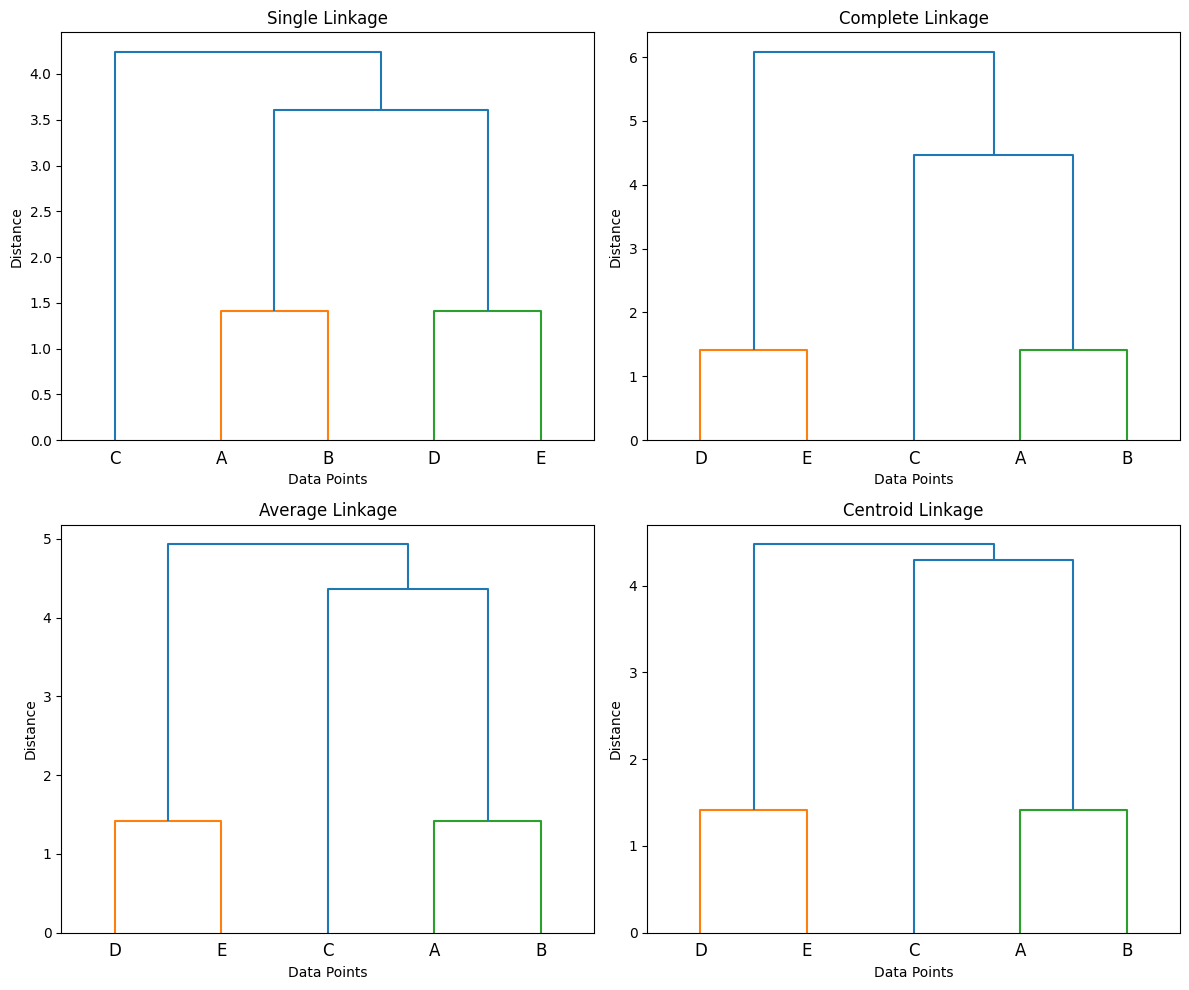

In [3]:
points_np = np.array([
    [2, 5],  # A
    [3, 4],  # B
    [5, 8],  # C
    [6, 2],  # D
    [7, 3]   # E
])

# Linkage methods
methods = ['single', 'complete', 'average', 'centroid']

# Plot dendrograms for each method
plt.figure(figsize=(12, 10))
for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    linked = linkage(points_np, method=method)
    dendrogram(linked, labels=['A', 'B', 'C', 'D', 'E'])
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

#### Plot clusters for each linkage method
